In [241]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
root = Path('/Users/shhong/Dropbox/network_data/output_brep_2')

In [3]:
root

PosixPath('/Users/shhong/Dropbox/network_data/output_brep_2')

In [8]:
xyz = np.loadtxt(root / "GoCcoordinates.sorted.dat")
dist0 = np.loadtxt(root / "GoCtoGoCdistances.dat")

In [38]:
src = np.loadtxt(root / "GoCtoGoCsources.dat").astype(int)
tgt = np.loadtxt(root / "GoCtoGoCtargets.dat").astype(int)

In [11]:
axon0 = np.loadtxt(root / "GoCaxoncoordinates.sorted.dat")

In [26]:
axon0.shape
npoints = int(axon0.shape[1]/3)

In [270]:
# axon = [np.vstack([x[:3], x.reshape(npoints, 3)[1::2]]) for x in axon0]
axon = [x.reshape(npoints, 3)[1::2] for x in axon0]
axon[0]

array([[ 219. ,  -10.5,   23. ],
       [ 187. ,  104.5,   -4. ],
       [ 244. ,  102.5,  -50. ],
       [ 194. ,   69.5,   71. ],
       [ 246. ,   -1.5,   32. ],
       [ 220. ,  -69.5,  -24. ],
       [ 205. ,  -76.5,  -22. ],
       [ 211. ,    6.5,  -51. ],
       [ 261. ,  117.5,   67. ],
       [ 242. ,  143.5,   96. ],
       [ 181. ,   10.5,   62. ],
       [ 202. ,   62.5,  -23. ],
       [ 251. ,  -20.5,   43. ],
       [ 199. ,   57.5,    5. ],
       [ 193. , -107.5,   14. ],
       [ 258. ,   94.5,   -4. ],
       [ 174. ,   61.5,   45. ],
       [ 210. , -161.5,   34. ],
       [ 194. ,  116.5,   68. ],
       [ 240. ,  125.5,   33. ]])

In [271]:
from tqdm import tqdm_notebook
colx = {}
for i in tqdm_notebook(range(ncell)):
    for j in range(ncell):
        if i!=j:
#         i = 1759
#         j = 1936
            di, ii = cKDTree(axon[i]).query(xyz[j])
            axon_len = np.sqrt(np.sum((axon[i][ii]-xyz[i])**2))
#             print(di, axon_len, axon_len+di)
            if di<100:
                colx[(i, j)] = axon_len + di
            

In [150]:
il, = np.where(np.logical_and(src==i, tgt==j))
il

array([42039])

In [151]:
dist0[il]

array([282.05695718])

In [88]:
axon[[1,2]]

TypeError: list indices must be integers or slices, not list

In [96]:
ncell = 1995
ncoords = int(axon.shape[0]/ncell)

In [111]:
cellind!=0

array([False, False, False, ...,  True,  True,  True])

In [108]:
cellind.shape

(79800,)

In [109]:
axon.shape

(79800, 3)

In [113]:
xyz[0]

array([219.,   0.,  23.])

In [119]:
cellind[cellind!=i][1173]

30

In [159]:
len(colx.keys())

256440

In [160]:
src.size

184684

In [256]:
i = 0
s, t = src[i], tgt[i]
print(s, t)
print(colx[(s, t)])
print(dist0[i])

1921 1920
53.86294886692424
98.2372633010221


In [225]:
colx[(t, s)]

143.14873147064438

In [261]:
s, t
di, ii = cKDTree(axon[s]).query(xyz[t])
axon_len = np.sqrt(np.sum((axon[s][ii]-xyz[s])**2))
print(s, t, di, axon_len)

1921 1920 34.07345007480164 0.0


In [235]:
dd[np.logical_and(dd[:,0]==s, dd[:,1]==t),2]

array([122.95527642])

In [275]:
dd = np.array([colx[(src[i], tgt[i])]-dist0[i] for i, _ in enumerate(src) if (src[i], tgt[i]) in colx.keys()])

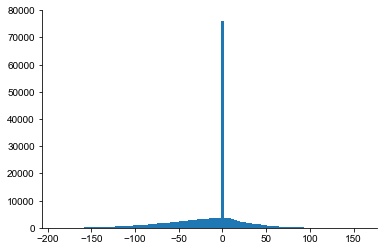

In [276]:
_ = plt.hist(dd,100)

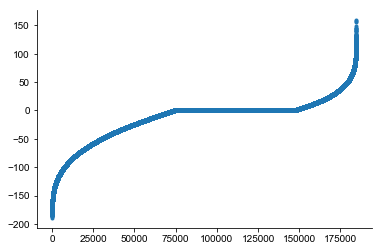

In [277]:
plt.plot(np.sort(dd),'.')

# ??

In [182]:
xyz[t]

array([1350.,  511.,  108.])

In [189]:
dd = np.loadtxt(root / "GoCdistances0.dat")

In [238]:
plt.plot(dd)

NameError: name 'plot' is not defined

In [273]:
len(colx.keys())

256263